In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

# https://gymnasium.farama.org/environments/classic_control/pendulum/#pendulum

ENV_NAME = 'Pendulum-v1'
env = gym.make(ENV_NAME, g=9.81, render_mode="rgb_array")
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<PendulumEnv<Pendulum-v1>>>>>

In [2]:
env.observation_space 

Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)

In [3]:
env.action_space # Torque

Box(-2.0, 2.0, (1,), float32)

In [4]:
observation, info = env.reset()
observation, info

(array([-0.8229725 , -0.56808126,  0.68661225], dtype=float32), {})

In [5]:
x, y, angular_velocity = observation
x, y, angular_velocity

(-0.8229725, -0.56808126, 0.68661225)

In [6]:
action = env.action_space.sample() # choose a random action
action

array([0.07438119], dtype=float32)

In [7]:
observation, reward, terminated, truncated, info = env.step(action)
observation, reward, terminated, truncated, info

(array([-0.8149446 , -0.5795388 ,  0.27980363], dtype=float32),
 -6.485650098446855,
 False,
 False,
 {})

In [8]:
env_screen = env.render() # numpy array

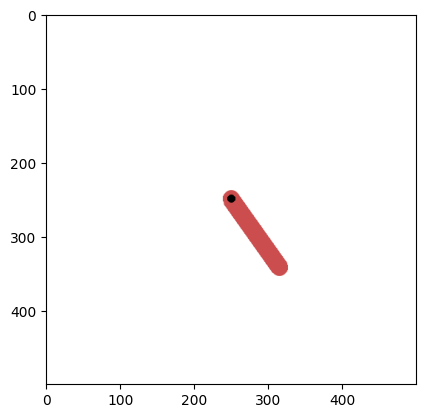

In [9]:
plt.imshow(env_screen)

In [10]:
###################################
# play Pendulum-v1 with a policy
###################################

import gymnasium as gym
import numpy as np

ENV_NAME = 'Pendulum-v1'
env = gym.make(ENV_NAME , render_mode="rgb_array")
observation, _ = env.reset()
env_screens = []

terminated = False
truncated = False
observation, _ = env.reset()
total_reward = 0.0
while not terminated and not truncated:
    action = env.action_space.sample() 
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    env_screens.append(env.render())
total_reward

-1653.157638975461

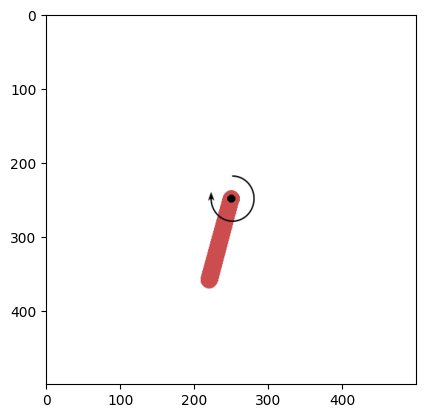

In [11]:
####################################################
# create an animation
#===================================================
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


fig, ax = plt.subplots()
im = ax.imshow(env_screens[0])

def update(i):
    im.set_data(env_screens[i])
    return (im)

animation = FuncAnimation(fig=fig, func=update, frames=len(env_screens), interval=100)
plt.show()

# display the animation in the notebook
HTML(animation.to_jshtml())


## Solve Pendulum-v1 using Stable Baselines3

To solve the **Pendulum-v1** environment using Stable Baselines3 (SB3), 
you need to train the model for **100,000 or more timesteps** to achieve a good score. 


The **Pendulum-v1** environment is more challenging compared to simpler environments like **CartPole-v1**, 
and the learning speed of the model is not as fast. 


- Minimum: Around 50,000 timesteps can start showing some progress, but the model may still perform poorly compared to longer training times.
- Recommended: 100,000 timesteps is often a good starting point to see solid performance improvements.
- Optimal: For consistent, good scores, training for 200,000 to 500,000 timesteps can help the model generalize better and perform well on the environment.


In [30]:
import gymnasium as gym
from stable_baselines3 import PPO

# Create environment
env = gym.make("Pendulum-v1", render_mode="rgb_array")

# Create model
model = PPO("MlpPolicy", env, verbose=1)

# Train the model
TIMESTEPS = 50_000  # Increase for better performance
model.learn(total_timesteps=TIMESTEPS)

# Save the model
model.save("ppo_pendulum")
env.close()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.36e+03 |
| time/              |           |
|    fps             | 1484      |
|    iterations      | 1         |
|    time_elapsed    | 1         |
|    total_timesteps | 2048      |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | -1.41e+03   |
| time/                   |             |
|    fps                  | 845         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.001995001 |
|    clip_fraction        | 0.00645     |
|    clip_range           | 0.2         |
|    entro

In [12]:
#  Test the trained agent
import time
import gymnasium as gym
from stable_baselines3 import PPO

# Load trained model
model = PPO.load("ppo_pendulum")

# Create environment
env = gym.make("Pendulum-v1", render_mode="human")

obs, _ = env.reset()
done = False
MAX_STEP = 2000
total_reward = 0.0
for _ in range(MAX_STEP):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, _ = env.step(action)
    total_reward += reward
    env.render()
    time.sleep(0.02)  # Slow down for visualization
    if done or truncated:
        break
env.close()

total_reward

C:\Users\t1\anaconda3\Lib\site-packages\torch\cuda\__init__.py:118: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11060). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ..\c10\cuda\CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


-1280.6042397032345

In [ ]:
import time
import gymnasium as gym

env = gym.make("Pendulum-v1", render_mode="rgb_array")
total_rewards = []
num_tests = 5
for i in range(num_tests):
    terminated = False
    truncated = False
    obs, _ = env.reset()
    total_reward = 0.0
    while not terminated or not truncated:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
    total_rewards.append(total_reward)
np.mean(total_rewards)    